# Titanic Prediction
Daniel Marek - úspěšnošt 70 %

## 1. Přidal jsem si knihovny
Některé asi nepoužívám,ale přišlo mi zbytečné je odstraňovat

In [18]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt

import seaborn as sns
import missingno
from sklearn import preprocessing

plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize


from sklearn.tree import DecisionTreeClassifier

## 2. Nahrál jsem soubory k trénování a testování


In [19]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


## 3. Vyhledal jsem si chybějící hodnoty

<AxesSubplot:>

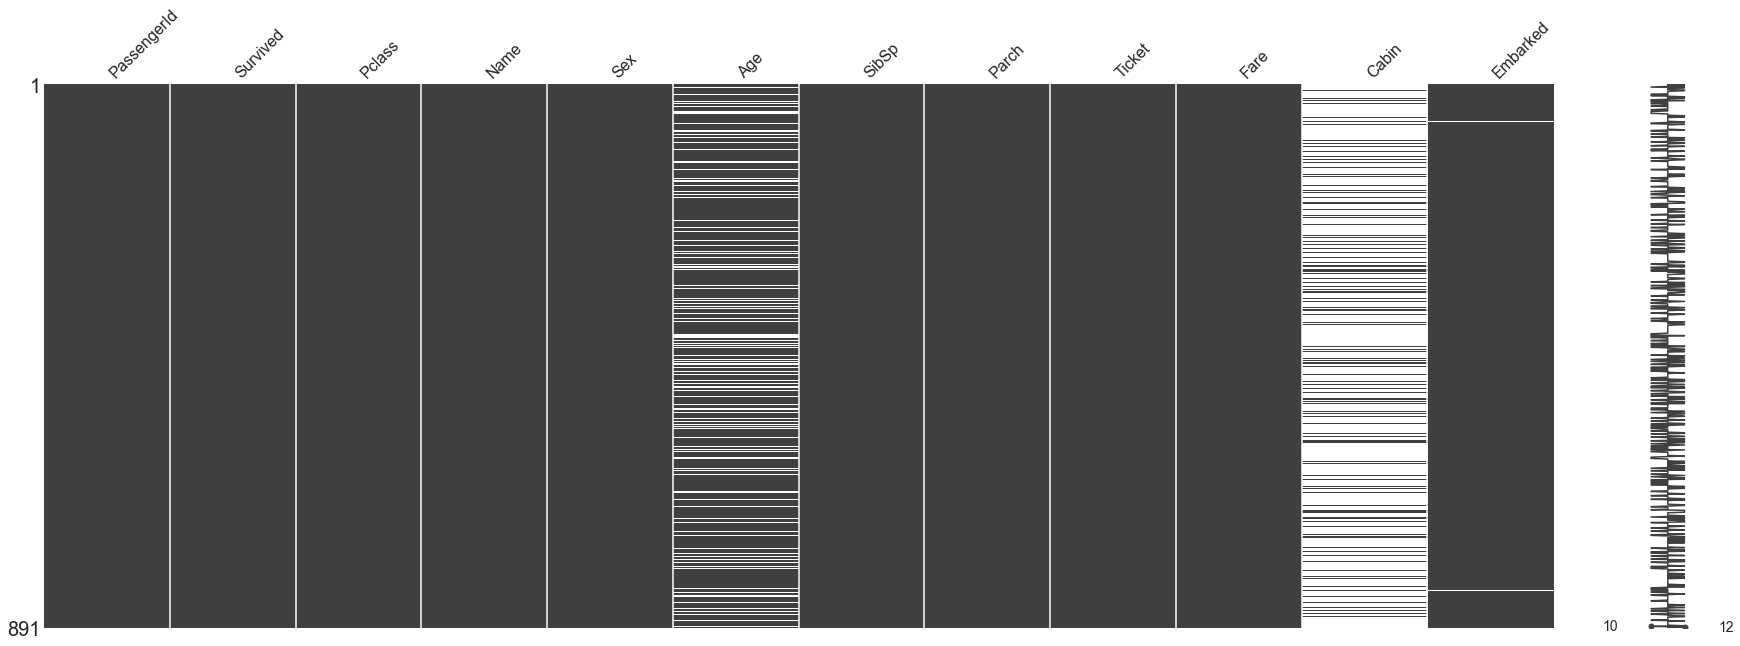

In [20]:
missingno.matrix(train, figsize = (30,10))


In [21]:
def najdi_chybejici_hodnoty(df, sloupce):
    
    chybejici_hodnoty = {}
    df_delka = len(df)
    for column in sloupce:
        vsechny_hodnoty = df[column].value_counts().sum()
        chybejici_hodnoty[column] = df_delka-vsechny_hodnoty
       
       
       
    return chybejici_hodnoty
chybejicihodnoty =najdi_chybejici_hodnoty(train, sloupce=train.columns)
chybejicihodnoty

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

## 4. Prohlédl jsem si hodnoty a dal je do dataframu

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
hodnoty = pd.DataFrame()

In [24]:
hodnoty["Survived"] = train["Survived"]
hodnoty["Pclass"] = train["Pclass"]
hodnoty["Sex"] = train["Sex"]
hodnoty["Sex"] = np.where(train["Sex"] == "female", 1, 0)
train['Age'] = train['Age'].replace(np.NaN, 26)
test['Age'] = test['Age'].replace(np.NaN, 26)
#rozhodnul jsem doplnit age prumernym vekem lidií v roce kdy se potopil titanic
hodnoty["Age"] = train["Age"]
hodnoty["SibSp"] = train["SibSp"]
hodnoty["Parch"] = train["Parch"]

<AxesSubplot:xlabel='count', ylabel='Ticket'>

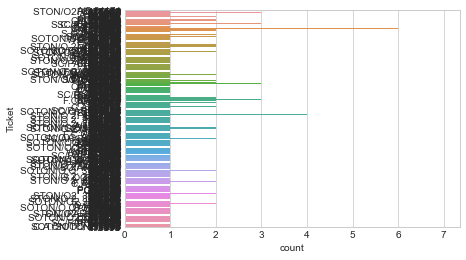

In [25]:
sns.countplot(y="Ticket", data = train)


In [26]:
hodnoty["Fare"] = train["Fare"]

In [27]:
hodnoty.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [28]:
chybejicihodnoty["Embarked"]

2

In [29]:
hodnoty["Embarked"] = train["Embarked"]
hodnoty = hodnoty.dropna(subset=["Embarked"])
hodnoty['Embarked'] = hodnoty['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

## 5. Udělal jsem si x_train a y_train, které budu používat v model.fit()

In [30]:
x_train = x_train = hodnoty.drop("Survived", axis = 1)
y_train = hodnoty.Survived

In [31]:
x_train.shape

(889, 7)

In [32]:
y_train.shape

(889,)

In [33]:

x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [34]:

model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

## 6. Udělal jsem si nový dataframe, který budu používat k predikci

In [35]:
Potrebnehodnoty = pd.DataFrame()

In [36]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

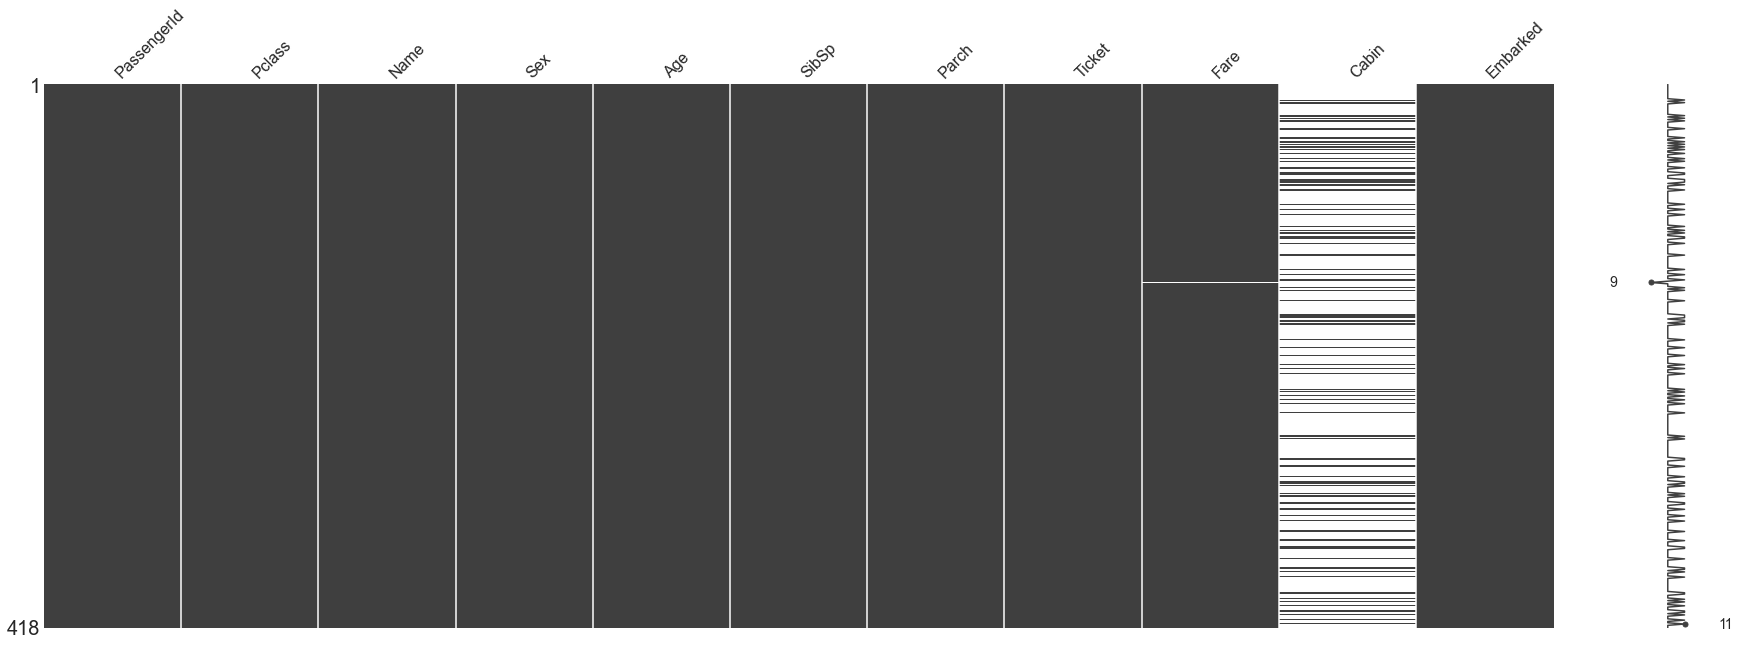

In [37]:
missingno.matrix(test, figsize = (30,10))

In [38]:

Potrebnehodnoty["Pclass"] = test["Pclass"]
Potrebnehodnoty["Sex"] = test["Sex"]
Potrebnehodnoty["Sex"] = np.where(test["Sex"] == "female", 1, 0)
test['Age'] = test['Age'].replace(np.NaN, 26)
Potrebnehodnoty["Age"] = test["Age"]

Potrebnehodnoty["SibSp"] = test["SibSp"]
Potrebnehodnoty["Parch"] = test["Parch"]
Potrebnehodnoty["Fare"] = test["Fare"]
Potrebnehodnoty["Fare"] = Potrebnehodnoty["Fare"].replace(np.NaN, 10)
Potrebnehodnoty["Embarked"] = test["Embarked"]
Potrebnehodnoty = Potrebnehodnoty.dropna(subset=["Embarked"])
Potrebnehodnoty['Embarked'] = Potrebnehodnoty['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [39]:
Potrebnehodnoty.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


## 7. Predicknul jsem a poslal úspěšnost 70%

In [40]:
predictions = model.predict(Potrebnehodnoty)

In [41]:
predictions[:20]

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0],
      dtype=int64)

In [42]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [43]:
submission.to_csv('gender_submission.csv', index=False)
submissions_check = pd.read_csv("gender_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
